In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ipl_df = pd.read_csv("ipl_data.csv")
matches_df = pd.read_csv("matches.csv")
deliveries_df = pd.read_csv("deliveries.csv")

In [3]:
# from delivaries dataset

In [4]:
#Total Runs Scored Per Over

In [5]:
total_runs_per_over = deliveries_df.groupby(['match_id', 'over'])['total_runs'].sum().reset_index()

In [59]:
# here we are grouping the data by mach_id and over to sum up total runs score in each over

In [60]:
print(total_runs_per_over.head(10))

   match_id  over  total_runs
0    335982     0           7
1    335982     1          23
2    335982     2           9
3    335982     3          27
4    335982     4          18
5    335982     5           3
6    335982     6          14
7    335982     7          10
8    335982     8           9
9    335982     9          18


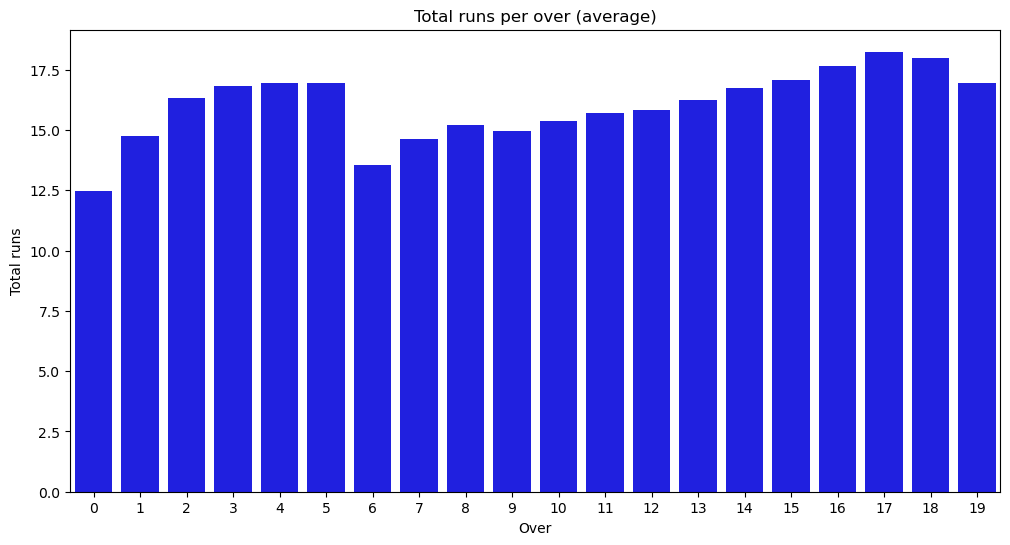

In [61]:
plt.figure(figsize=(12, 6))
sns.barplot(x='over', y='total_runs', data=total_runs_per_over, color='blue', errorbar=None)
plt.xlabel('Over')
plt.ylabel('Total runs')
plt.title('Total runs per over (average)')
plt.show()

In [62]:
# death overs have the highest scoring rates

In [63]:
# dismissal types distribution

In [64]:
#here we are counting how many dismissals happened like bowled,caught,run out etc...

In [65]:
dismissal_types = deliveries_df['dismissal_kind'].value_counts()
print(dismissal_types)

caught                   8063
bowled                   2212
run out                  1114
lbw                       800
caught and bowled         367
stumped                   358
retired hurt               15
hit wicket                 15
obstructing the field       3
retired out                 3
Name: dismissal_kind, dtype: int64


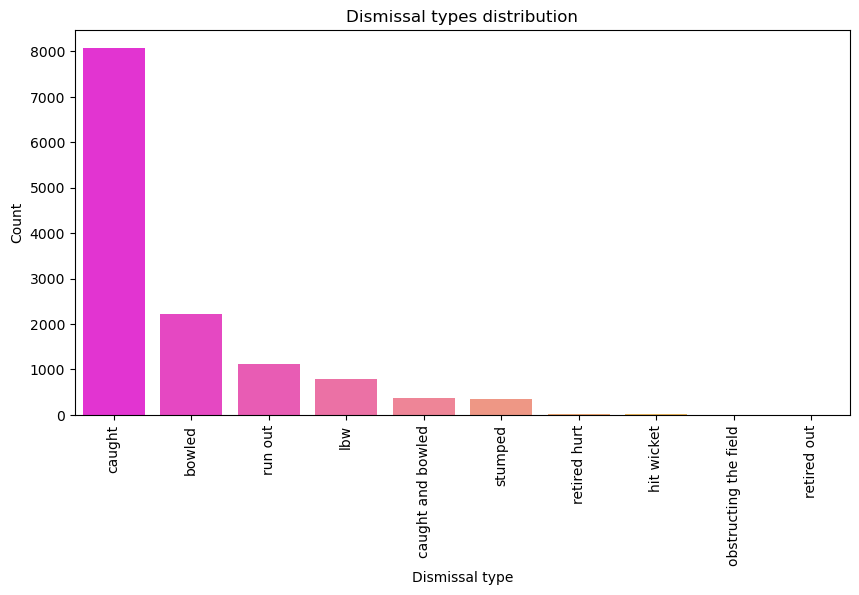

In [66]:
plt.figure(figsize=(10, 5))
sns.barplot(x=dismissal_types.index, y=dismissal_types.values, palette='spring')
plt.xlabel('Dismissal type')
plt.ylabel('Count')
plt.title('Dismissal types distribution')
plt.xticks(rotation=90)
plt.show()

In [67]:
# we are have caught is the most dismissal type where as we see less retired,hit wicket,obstructing the field,retired out

In [68]:
#total extra runs conceeded by teams

In [69]:
total_extra_runs = deliveries_df.groupby('bowling_team')['extra_runs'].sum().reset_index()
print(total_extra_runs)

                   bowling_team  extra_runs
0           Chennai Super Kings        1842
1               Deccan Chargers         659
2                Delhi Capitals         725
3              Delhi Daredevils        1268
4                 Gujarat Lions         188
5                Gujarat Titans         295
6               Kings XI Punjab        1571
7          Kochi Tuskers Kerala         110
8         Kolkata Knight Riders        1957
9          Lucknow Super Giants         386
10               Mumbai Indians        2295
11                Pune Warriors         335
12                 Punjab Kings         480
13             Rajasthan Royals        1917
14       Rising Pune Supergiant         111
15      Rising Pune Supergiants         108
16  Royal Challengers Bangalore        2040
17  Royal Challengers Bengaluru         151
18          Sunrisers Hyderabad        1254


In [70]:
# it groups the data by bowling team and sums up all extra runs conceded

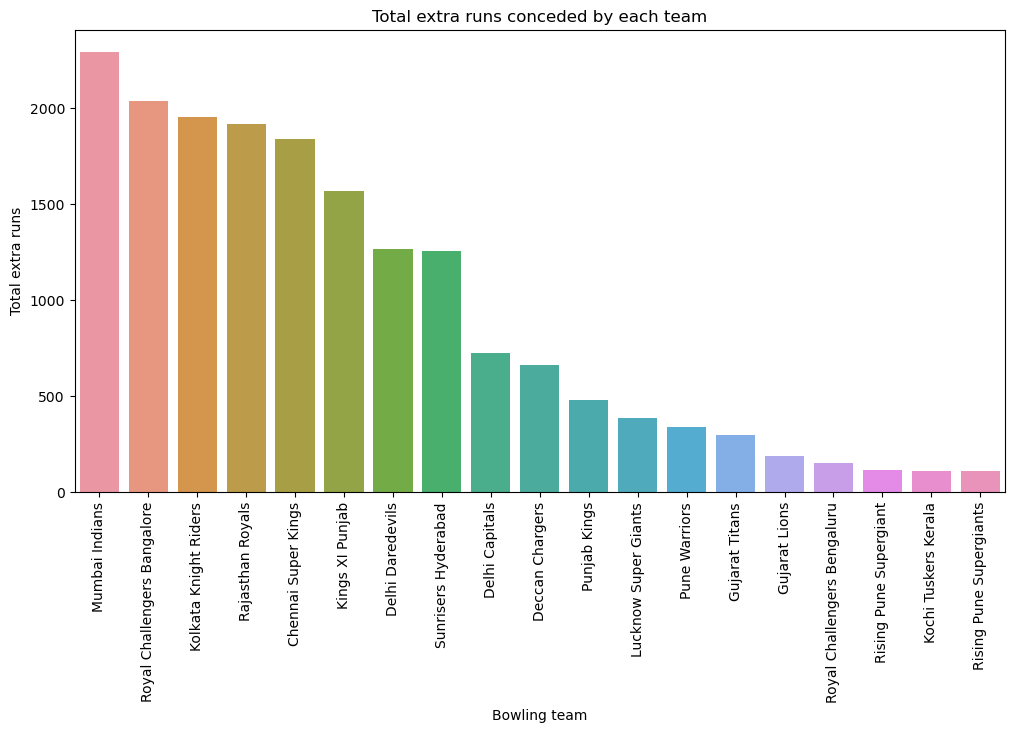

In [71]:
sorted_data = total_extra_runs.sort_values(by='extra_runs', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='bowling_team', y='extra_runs', data=sorted_data)
plt.xticks(rotation=90)
plt.xlabel('Bowling team')
plt.ylabel('Total extra runs')
plt.title('Total extra runs conceded by each team')
plt.show()


In [72]:
#average runs per over

In [73]:
average_runs_per_over = deliveries_df.groupby('over')['total_runs'].mean().reset_index()
print(average_runs_per_over)

    over  total_runs
0      0    0.981663
1      1    1.173528
2      2    1.316099
3      3    1.356538
4      4    1.369100
5      5    1.373055
6      6    1.103107
7      7    1.189948
8      8    1.242087
9      9    1.224577
10    10    1.262623
11    11    1.287686
12    12    1.301240
13    13    1.343645
14    14    1.393504
15    15    1.434273
16    16    1.498778
17    17    1.587839
18    18    1.646896
19    19    1.776855


In [74]:
#here we group the data by over and calculate avg runs using mean in each over

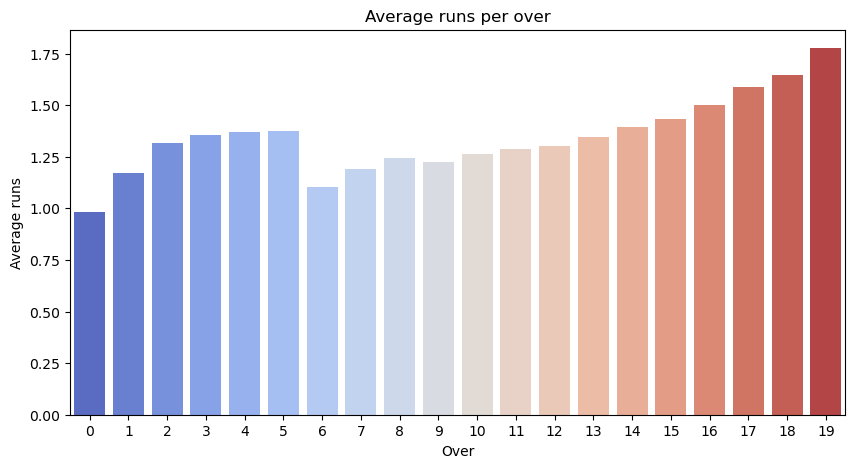

In [75]:
plt.figure(figsize=(10, 5))
sns.barplot(x='over', y='total_runs', data=average_runs_per_over, palette='coolwarm')
plt.xlabel('Over')
plt.ylabel('Average runs')
plt.title('Average runs per over')
plt.show()

In [81]:
# here we can see that in the start (power play) they are playing well when we see in the middle overs run rate is consistent and at the death overs there is an increase in run rate  

In [82]:
#distribution of runs per ball(1s,2s,3s....)

In [83]:
runs_distribution = deliveries_df['batsman_runs'].value_counts().reset_index()
runs_distribution.columns = ['Runs Scored', 'Count']
print(runs_distribution)

   Runs Scored   Count
0            0  103940
1            1   96778
2            4   29850
3            2   16453
4            6   13051
5            3     783
6            5      65


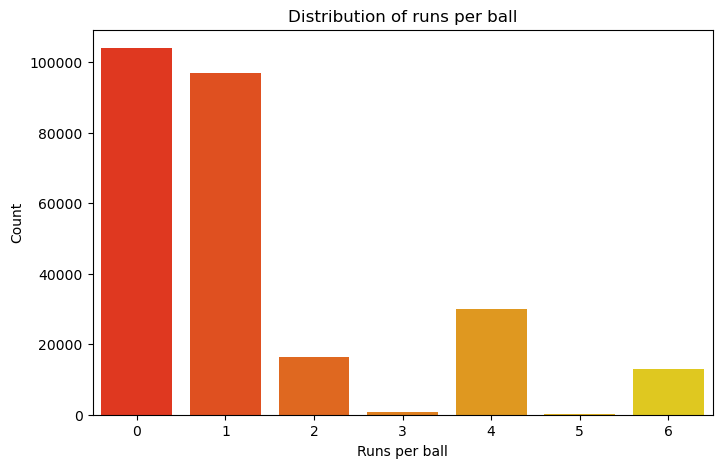

In [84]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Runs Scored', y='Count', data=runs_distribution, palette='autumn')
plt.xlabel('Runs per ball')
plt.ylabel('Count')
plt.title('Distribution of runs per ball')
plt.show()

In [79]:
#dot ball % by bowler

In [80]:
dot_balls = deliveries_df[deliveries_df['batsman_runs'] == 0].groupby('bowler')['ball'].count()
# identifying when the batsman didnt hit the ball  
total_balls = deliveries_df.groupby('bowler')['ball'].count()
dot_ball_percentage = (dot_balls / total_balls * 100).fillna(0).reset_index()
# we are calculaating % of dot ball delivaries for each bowler
dot_ball_percentage.columns = ['Bowler', 'Dot ball %']
print(dot_balls.head(10))

bowler
A Ashish Reddy      89
A Badoni             6
A Chandila         105
A Choudhary         49
A Dananjaya          7
A Flintoff          21
A Kamboj            27
A Kumble           410
A Mishra          1282
A Mithun           114
Name: ball, dtype: int64


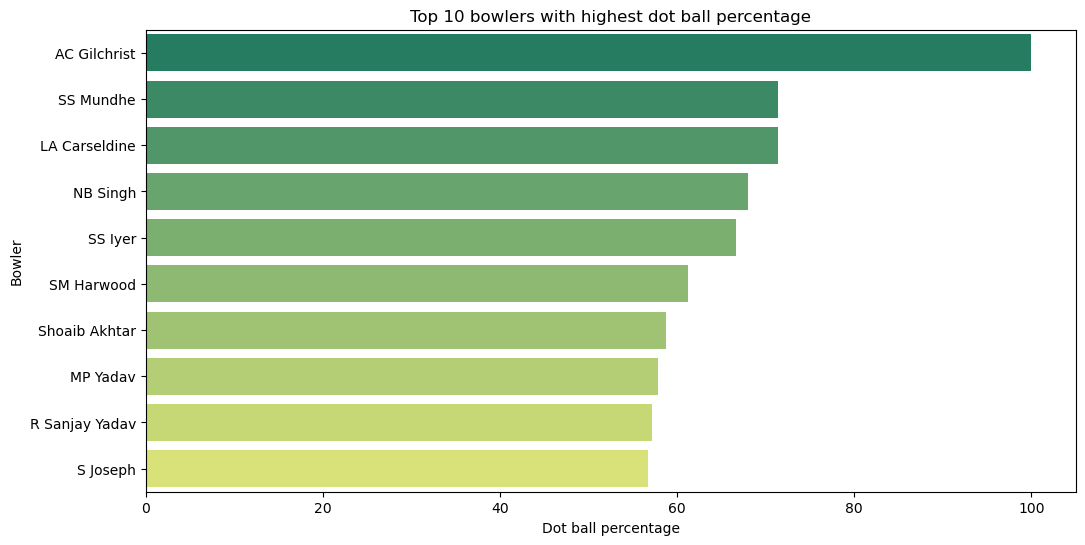

In [85]:
top_10_dot_bowlers = dot_ball_percentage.sort_values(by='Dot ball %', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Dot ball %', y='Bowler', data=top_10_dot_bowlers, palette='summer')
plt.xlabel('Dot ball percentage')
plt.ylabel('Bowler')
plt.title('Top 10 bowlers with highest dot ball percentage')
plt.show()

In [108]:
# it shows top 10 bowlers with highest dot ball we have AC Gilchrist as the highest dot ball %

In [86]:
#wicket distribution accross overs

In [87]:
wicket_distribution = deliveries_df[deliveries_df['is_wicket'] == 1].groupby('over')['is_wicket'].count().reset_index()
# we are filtering data for only wicket taking deliveries

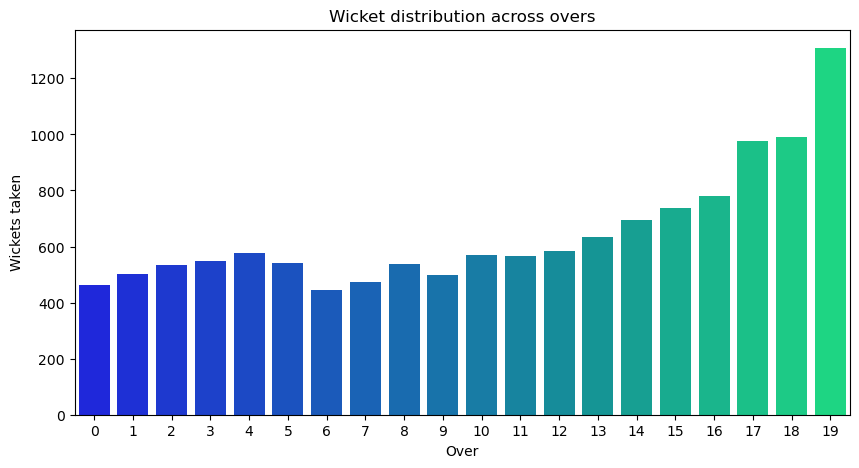

In [89]:
plt.figure(figsize=(10, 5))
sns.barplot(x='over', y='is_wicket', data=wicket_distribution, palette='winter')
plt.xlabel('Over')
plt.ylabel('Wickets taken')
plt.title('Wicket distribution across overs')
plt.show()

In [109]:
# here we can see highest no of wickets falls at 19th over that is at the end of the match

In [90]:
#from ipl_dataset

In [91]:
#top 10 batsmen by strinke rate

In [92]:
top_10_strike_rate = ipl_df[['Name', 'Team', 'BattingS/R']].dropna().sort_values(by='BattingS/R', ascending=False).head(10)
# we are selecting player names team name and their strike rate
print(top_10_strike_rate)

                   Name Team  BattingS/R
145       Andre Russell  KKR      178.57
138    Tushar Deshpande  CSK      175.00
205  Krishnappa Gowtham  LSG      169.09
151        Sunil Narine  KKR      161.69
98         Jofra Archer   MI      157.25
26      Nicholas Pooran  SRH      154.98
215       Hardik Pandya   GT      153.91
73        Glenn Maxwell  RCB      151.84
156       Mohammad Nabi  KKR      151.26
216     Lockie Ferguson   GT      151.22


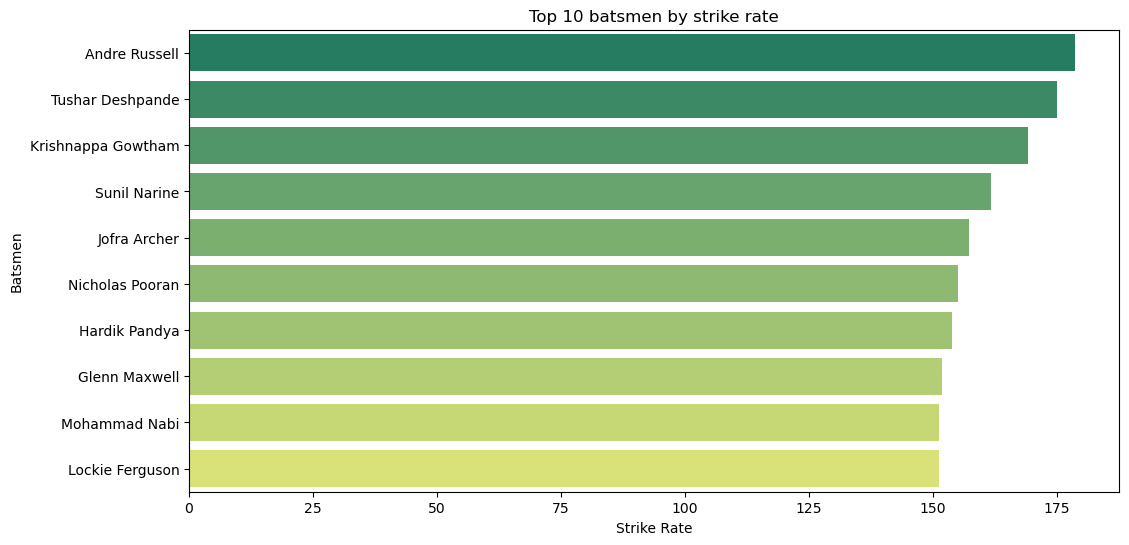

In [94]:
plt.figure(figsize=(12, 6))
sns.barplot(x='BattingS/R', y='Name', data=top_10_strike_rate, palette='summer')
plt.xlabel('Strike Rate')
plt.ylabel('Batsmen')
plt.title('Top 10 batsmen by strike rate')
plt.show()

In [110]:
# we can see here that Andre Russell has the highest strike rate  

In [95]:
#most sixes hit by players

In [97]:
top_six_hitters = ipl_df[['Name', 'Team', '6s']].dropna().sort_values(by='6s', ascending=False)
#select player name,team name and no.of 6's they hit and sort them in descending order
print(top_six_hitters.head(10))

               Name Team     6s
94     Rohit Sharma   MI  227.0
121        MS Dhoni  CSK  219.0
100  Kieron Pollard   MI  214.0
72      Virat Kohli  RCB  210.0
175    David Warner   DC  201.0
128   Robin Uthappa  CSK  168.0
123   Ambati Rayudu  CSK  149.0
145   Andre Russell  KKR  143.0
193        KL Rahul  LSG  134.0
48     Sanju Samson   RR  132.0


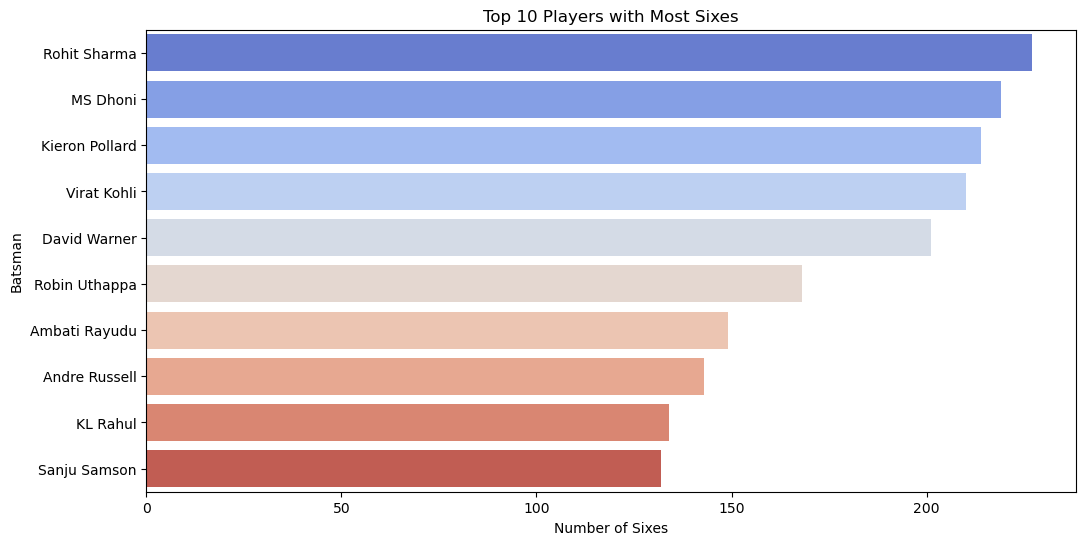

In [99]:
plt.figure(figsize=(12, 6))
sns.barplot(x='6s', y='Name', data=top_six_hitters.head(10), palette='coolwarm')
plt.xlabel('Number of Sixes')
plt.ylabel('Batsman')
plt.title('Top 10 Players with Most Sixes')
plt.show()


In [115]:
# we are getting rohit sharma as the top player with most sixes and ms dhoni,kieron pollard are also close 

In [112]:
#top 10 economical bowlers

In [113]:
top_economical_bowlers = ipl_df[['Name', 'Team', 'EconomyRate']].dropna().sort_values(by='EconomyRate').head(10)
#select bowler name,team name and their economy rate
print(top_economical_bowlers.head(10))

                    Name Team  EconomyRate
157       Ajinkya Rahane  KKR         5.00
163           Anukul Roy  KKR         5.50
37         Aiden Markram  SRH         5.75
214          Rashid Khan   GT         6.33
151         Sunil Narine  KKR         6.74
81         Shahbaz Ahmed  RCB         6.80
147   Varun Chakravarthy  KKR         6.82
122            Moeen Ali  CSK         6.84
228         Jayant Yadav   GT         6.86
55   Ravichandran Ashwin   RR         6.91


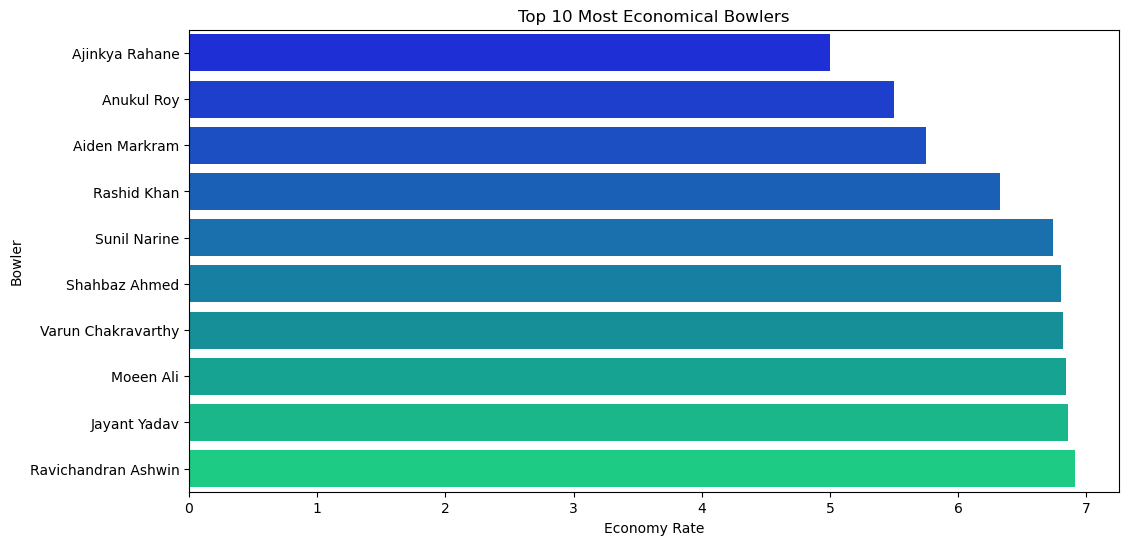

In [114]:
plt.figure(figsize=(12, 6))
sns.barplot(x='EconomyRate', y='Name', data=top_economical_bowlers.head(10), palette='winter')
plt.xlabel('Economy Rate')
plt.ylabel('Bowler')
plt.title('Top 10 Most Economical Bowlers')
plt.show()


In [116]:
# we got Ajinkya rahane as the most economical bowler

In [101]:
ipl_df['BoundariesConceded'] = ipl_df['4s'].fillna(0) + ipl_df['6s'].fillna(0)
# we calculated conceded boundaries by adding 4s and 6s
top_most_boundaries = ipl_df[['Name', 'Team', 'BoundariesConceded']].dropna().sort_values(by='BoundariesConceded', ascending=False)
#sorting the bowlers by most boundaries conceded
print(top_most_boundaries.head(10))

               Name  Team  BoundariesConceded
4    Shikhar Dhawan  PBKS               778.0
72      Virat Kohli   RCB               756.0
175    David Warner    DC               726.0
94     Rohit Sharma    MI               718.0
128   Robin Uthappa   CSK               630.0
121        MS Dhoni   CSK               544.0
79   Dinesh Karthik   RCB               511.0
157  Ajinkya Rahane   KKR               493.0
123   Ambati Rayudu   CSK               473.0
100  Kieron Pollard    MI               426.0


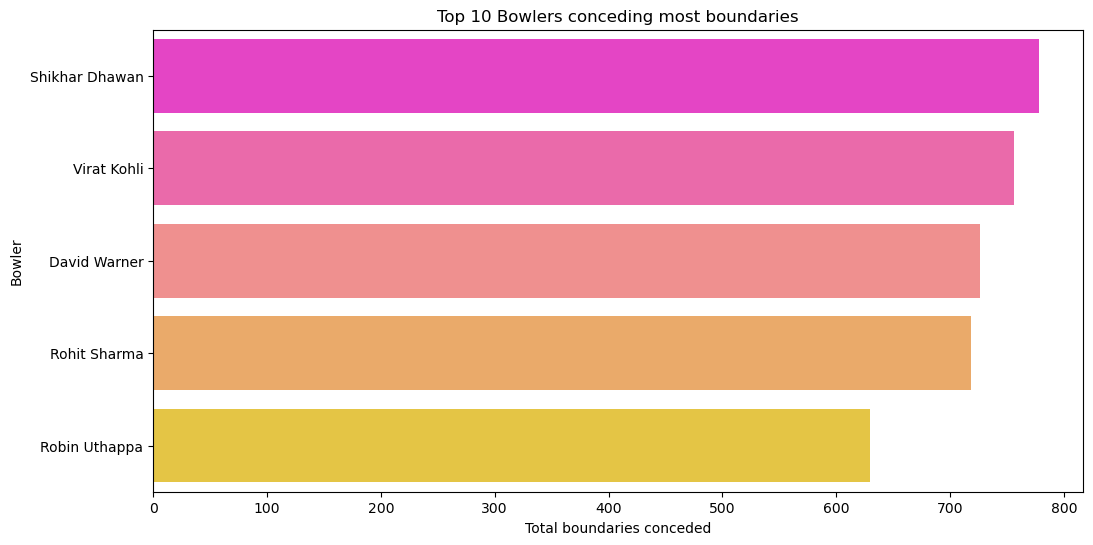

In [103]:
plt.figure(figsize=(12, 6))
sns.barplot(x='BoundariesConceded', y='Name', data=top_most_boundaries.head(), palette='spring')
plt.xlabel('Total boundaries conceded')
plt.ylabel('Bowler')
plt.title('Top 10 Bowlers conceding most boundaries')
plt.show()


In [104]:
#from deliveries dataset

In [105]:
# we are calculating total runs in powerplay i.e., over 1 to 6
powerplay_runs = deliveries_df[(deliveries_df['over'] >= 1) & (deliveries_df['over'] <= 6)]['total_runs'].sum()
print(powerplay_runs)

104405


In [106]:
#we are calculating total runs in death over i.e., over 16 to 20
death_over_runs = deliveries_df[(deliveries_df['over'] >= 16) & (deliveries_df['over'] <= 20)]['total_runs'].sum()
print(death_over_runs)

75412


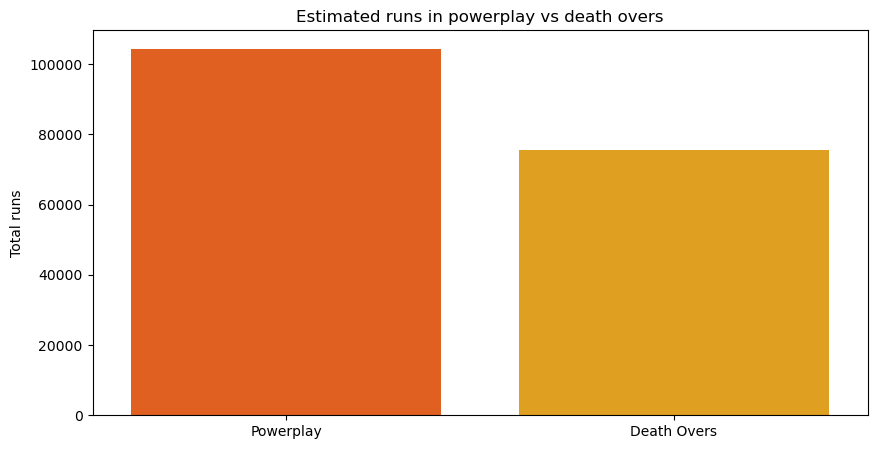

In [107]:
plt.figure(figsize=(10, 5))
sns.barplot(x=['Powerplay', 'Death Overs'], y=[powerplay_runs,death_over_runs], palette='autumn')
plt.ylabel('Total runs')
plt.title('Estimated runs in powerplay vs death overs')
plt.show()